In [1]:
import numpy as np 
import pandas as pd 
import tensorflow as tf
from matplotlib import pyplot as plt
import os 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU, LSTM, RNN
import matplotlib.dates as mdates
import matplotlib.ticker as plticker
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('/Users/salonikhanna/Desktop/FINAL PROJECT/BTC_USD_2018-10-11_2021-08-11-CoinDesk.csv',index_col=0)
print(df.head())
print('')
print(df.shape) 
print('') 

                Price
Date                 
11/10/18  6619.495845
12/10/18  6285.859203
13/10/18  6309.198921
14/10/18  6331.131154
15/10/18  6361.417016

(1035, 1)



In [3]:
### split dataset into train and test sets 
prediction_days = 50 
df_train = df.Price[:len(df.Price) - prediction_days]
df_test = df.Price[len(df.Price) - prediction_days:]

print(df_train.head())
print('')
print(df_train.shape)
print('')
print(df_test.head())
print('')
print(df_test.shape)
print('')

Date
11/10/18    6619.495845
12/10/18    6285.859203
13/10/18    6309.198921
14/10/18    6331.131154
15/10/18    6361.417016
Name: Price, dtype: float64

(985,)

Date
23/06/21    32404.33036
24/06/21    33532.25785
25/06/21    34718.47493
26/06/21    31622.08932
27/06/21    31739.29021
Name: Price, dtype: float64

(50,)



In [4]:
### preprocess the data by reshaping it 
training_set = df_train.values 
training_set = np.reshape(training_set, (len(training_set),1))

print("Training set after reshaping:")
print('')
print(training_set)
print('')
print(training_set.shape)
print('')

Training set after reshaping:

[[ 6619.495845]
 [ 6285.859203]
 [ 6309.198921]
 [ 6331.131154]
 [ 6361.417016]
 [ 6721.587503]
 [ 6724.833078]
 [ 6444.74701 ]
 [ 6374.648863]
 [ 6372.686817]
 [ 6407.479085]
 [ 6412.530491]
 [ 6396.880154]
 [ 6396.252324]
 [ 6407.667175]
 [ 6405.500726]
 [ 6392.179337]
 [ 6429.687141]
 [ 6266.189683]
 [ 6276.4645  ]
 [ 6321.713671]
 [ 6341.094813]
 [ 6360.141272]
 [ 6344.738943]
 [ 6405.139755]
 [ 6396.352124]
 [ 6425.917802]
 [ 6514.489453]
 [ 6412.524289]
 [ 6343.632504]
 [ 6365.655232]
 [ 6327.480646]
 [ 6327.154696]
 [ 6282.438677]
 [ 5524.801093]
 [ 5511.152834]
 [ 5448.600634]
 [ 5497.411279]
 [ 5553.014895]
 [ 4800.342897]
 [ 4246.312774]
 [ 4478.299558]
 [ 4405.744031]
 [ 4329.91722 ]
 [ 3728.872648]
 [ 3951.205029]
 [ 3640.557165]
 [ 3792.192364]
 [ 4174.319972]
 [ 4218.608363]
 [ 3952.447895]
 [ 4178.603828]
 [ 4118.518242]
 [ 3847.032737]
 [ 3889.29212 ]
 [ 3713.573383]
 [ 3578.206624]
 [ 3391.874146]
 [ 3452.616185]
 [ 3507.306367]
 [ 3419.7

In [5]:
### preprocess the data by scaling it 
sc = MinMaxScaler() 
training_set = sc.fit_transform(training_set) 
X_train = training_set[0 : len(training_set) -1]
y_train = training_set[1 : len(training_set)]
X_train = np.reshape(X_train, (len(X_train),1, 1)) 
                       
print("Scaled training set:")
print('')
print(training_set)
print('')
print("Define X_train")
print('')
print(X_train)
print('')
print(X_train.shape)
print("Define y_train:")
print('')
print(y_train)
print('')
print(y_train.shape)
print('')
print("X_train reshaped:")
print('')
print(X_train) 
print('') 
print(X_train.shape)
print('')

Scaled training set:

[[5.69314975e-02]
 [5.13849221e-02]
 [5.17729355e-02]
 [5.21375501e-02]
 [5.26410404e-02]
 [5.86287303e-02]
 [5.86826867e-02]
 [5.40263682e-02]
 [5.28610146e-02]
 [5.28283963e-02]
 [5.34068038e-02]
 [5.34907814e-02]
 [5.32306009e-02]
 [5.32201634e-02]
 [5.34099308e-02]
 [5.33739144e-02]
 [5.31524517e-02]
 [5.37760039e-02]
 [5.10579242e-02]
 [5.12287389e-02]
 [5.19809882e-02]
 [5.23031919e-02]
 [5.26198317e-02]
 [5.23637741e-02]
 [5.33679134e-02]
 [5.32218226e-02]
 [5.37133401e-02]
 [5.51858083e-02]
 [5.34906783e-02]
 [5.23453800e-02]
 [5.27114991e-02]
 [5.20768619e-02]
 [5.20714431e-02]
 [5.13280572e-02]
 [3.87326362e-02]
 [3.85057393e-02]
 [3.74658341e-02]
 [3.82772915e-02]
 [3.92016793e-02]
 [2.66888092e-02]
 [1.74782805e-02]
 [2.13349678e-02]
 [2.01287612e-02]
 [1.88681709e-02]
 [8.87604591e-03]
 [1.25722326e-02]
 [7.40783642e-03]
 [9.92871080e-03]
 [1.62814291e-02]
 [1.70177058e-02]
 [1.25928947e-02]
 [1.63526464e-02]
 [1.53537477e-02]
 [1.08404100e-02]
 [1.15

# 1. Recurrent Neural Network 

In [6]:
### define the RNN model 
### instantiate the RNN model object 
regr = Sequential() 

### add the input and LSTM layers 
regr.add(LSTM(units =4, activation ='relu', input_shape =(None, 1)))    

### add the output layer
regr.add(Dense(units =1))

### compile the RNN 
regr.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy']) 

### fit the model on the training set 
regr.fit(X_train, y_train, batch_size =5, epochs =150)  

2021-10-28 22:22:22.771819: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-28 22:22:22.984985: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/150
197/197 [==============================] - 2s 2ms/step - loss: 0.0770 - accuracy: 0.0010
Epoch 2/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0510 - accuracy: 0.0010
Epoch 3/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0381 - accuracy: 0.0010
Epoch 4/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0245 - accuracy: 0.0020
Epoch 5/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0127 - accuracy: 0.0020
Epoch 6/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0052 - accuracy: 0.0020
Epoch 7/150
197/197 [==============================] - 0s 2ms/step - loss: 0.0019 - accuracy: 0.0020
Epoch 8/150
197/197 [==============================] - 0s 2ms/step - loss: 8.5969e-04 - accuracy: 0.0020
Epoch 9/150
197/197 [==============================] - 0s 2ms/step - loss: 6.6273e-04 - accuracy: 0.0020
Epoch 10/150
197/197 [==============================] - 1s 3ms/step - loss: 6.3218e

197/197 [==============================] - 0s 2ms/step - loss: 2.3360e-04 - accuracy: 0.0020
Epoch 79/150
197/197 [==============================] - 1s 3ms/step - loss: 2.3513e-04 - accuracy: 0.0020
Epoch 80/150
197/197 [==============================] - 0s 2ms/step - loss: 2.4212e-04 - accuracy: 0.0020
Epoch 81/150
197/197 [==============================] - 0s 2ms/step - loss: 2.4095e-04 - accuracy: 0.0020
Epoch 82/150
197/197 [==============================] - 0s 2ms/step - loss: 2.4370e-04 - accuracy: 0.0020
Epoch 83/150
197/197 [==============================] - 0s 2ms/step - loss: 2.3850e-04 - accuracy: 0.0020
Epoch 84/150
197/197 [==============================] - 0s 2ms/step - loss: 2.3958e-04 - accuracy: 0.0020
Epoch 85/150
197/197 [==============================] - 0s 2ms/step - loss: 2.3531e-04 - accuracy: 0.0020
Epoch 86/150
197/197 [==============================] - 0s 2ms/step - loss: 2.5041e-04 - accuracy: 0.0020
Epoch 87/150
197/197 [==============================] - 0s 

In [7]:
test_set = df_test.values
inputs = np.reshape(test_set, (len(test_set), 1)) 
inputs = sc.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))
BTC_price_RNN = regr.predict(inputs) 
BTC_price_RNN = sc.inverse_transform(BTC_price_RNN)
print("Predicted BTC price: ", BTC_price_RNN)
print('')

Predicted BTC price:  [[32359.562]
 [33405.926]
 [34512.086]
 [31637.105]
 [31745.186]
 [34040.027]
 [34182.035]
 [35662.555]
 [34640.363]
 [33407.074]
 [33400.895]
 [34219.13 ]
 [35339.566]
 [33931.74 ]
 [33885.723]
 [34033.95 ]
 [32521.871]
 [33836.438]
 [33416.566]
 [34198.336]
 [32941.53 ]
 [32489.625]
 [32915.023]
 [31785.664]
 [31613.328]
 [31654.46 ]
 [31559.426]
 [31009.59 ]
 [29789.969]
 [31999.145]
 [32173.71 ]
 [33020.766]
 [33855.03 ]
 [34377.67 ]
 [36763.4  ]
 [38516.426]
 [39425.004]
 [39322.953]
 [40611.047]
 [41294.96 ]
 [39755.4  ]
 [38943.668]
 [37950.41 ]
 [39342.543]
 [40366.957]
 [42006.184]
 [43442.844]
 [43635.176]
 [45283.54 ]
 [44880.492]]



Visualize the results:



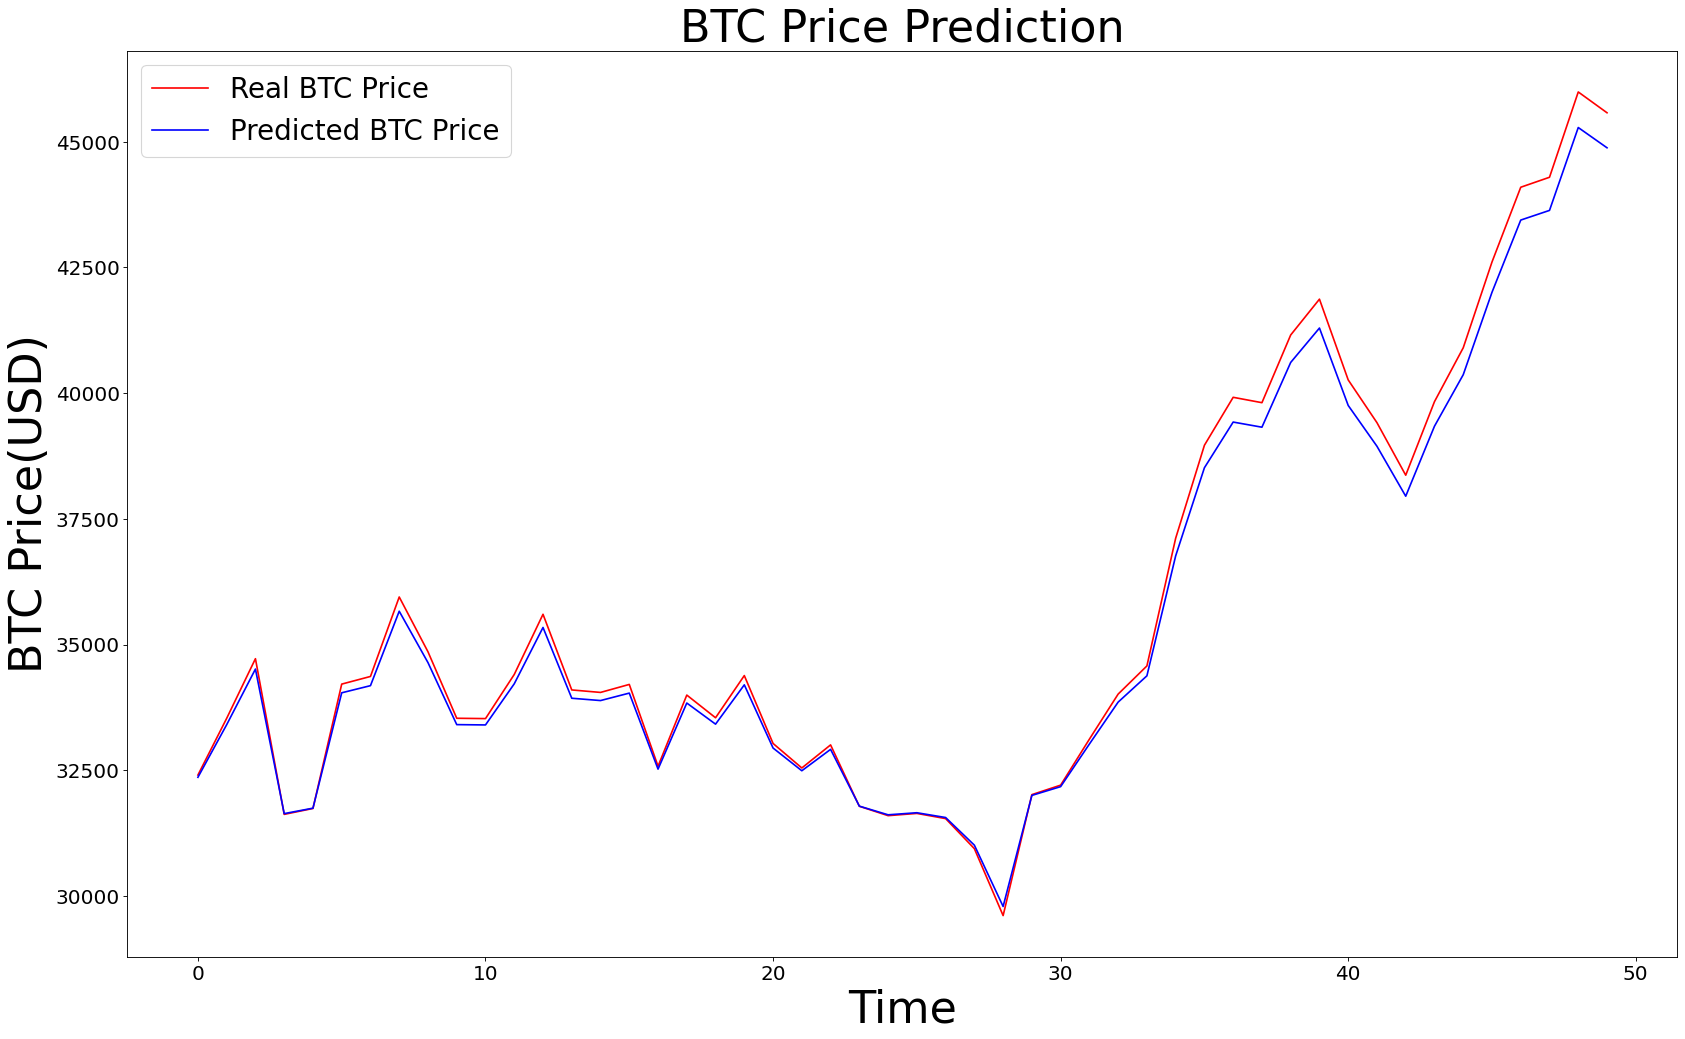

In [8]:
### visualize the results 
print("Visualize the results:") 
print('')

### plot the actual and predicted prices 
plt.figure(figsize =(25, 15), dpi =80, facecolor ='w', edgecolor ='k')
ax = plt.gca() 
plt.plot(test_set, color = 'red', label = "Real BTC Price") 
plt.plot(BTC_price_RNN, color = 'blue', label = "Predicted BTC Price") 
plt.title("BTC Price Prediction", fontsize = 40)

### reindex the 'df_test' dataframe 
df_test = df_test.reset_index() 
x = df_test.index

### set labels
labels = df_test['Date']

### set fontsize for 'x' and 'y' ticks 
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)

for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
    
### set plot labels 
plt.xlabel('Time', fontsize = 40)
plt.ylabel('BTC Price(USD)', fontsize = 40)

### set plot legend
plt.legend(loc = 2, prop = {'size' : 25})  

### show the plot 
plt.show()    

In [9]:
er1 = np.mean((BTC_price_RNN-test_set)**2)
print("Mean Square Error (MSE) using RNN:", er1)

Mean Square Error (MSE) using RNN: 33181006.938728016


# Prediction for the month of October : 1st to 28th

In [10]:
test_oct=pd.read_csv('/Users/salonikhanna/Desktop/FINAL PROJECT/BTC_Oct2021.csv')
print(test_oct.Price.shape)

(27,)


In [11]:
test_val = test_oct.Price.values
prices = np.reshape(test_val, (len(test_val), 1))
prices = sc.transform(prices)
prices = np.reshape(prices, (len(prices), 1, 1))
# Prediction from the trained GRU network
BTC_RNN_OCT = regr.predict(prices)
BTC_RNN_OCT = sc.inverse_transform(BTC_RNN_OCT)
er2 = np.mean((BTC_RNN_OCT-test_val)**2)
print("Mean Square Error (MSE) using RNN:", er2)

Mean Square Error (MSE) using RNN: 49071758.69603398


In [12]:
test_val

array([47856.10043, 48009.07696, 48974.94564, 50165.5875 , 54696.0897 ,
       54171.59329, 54226.39876, 54773.86552, 55256.43145, 57432.14438,
       55798.65086, 56869.28693, 57206.80485, 61703.72718, 60443.6774 ,
       61019.38364, 62090.13705, 63185.91868, 66476.28349, 62910.96133,
       60702.10362, 61132.66642, 60290.48616, 62996.94082, 62383.97483,
       58938.66342, 60950.7054 ])

In [13]:
BTC_RNN_OCT

array([[47105.42 ],
       [47255.28 ],
       [48202.965],
       [49374.613],
       [53865.28 ],
       [53342.926],
       [53397.473],
       [53942.8  ],
       [54424.047],
       [56600.02 ],
       [54965.38 ],
       [56036.14 ],
       [56374.19 ],
       [60899.754],
       [59627.812],
       [60208.605],
       [61290.39 ],
       [62399.562],
       [65741.98 ],
       [62121.04 ],
       [59888.453],
       [60322.953],
       [59473.387],
       [62208.113],
       [61587.62 ],
       [58112.48 ],
       [60139.28 ]], dtype=float32)

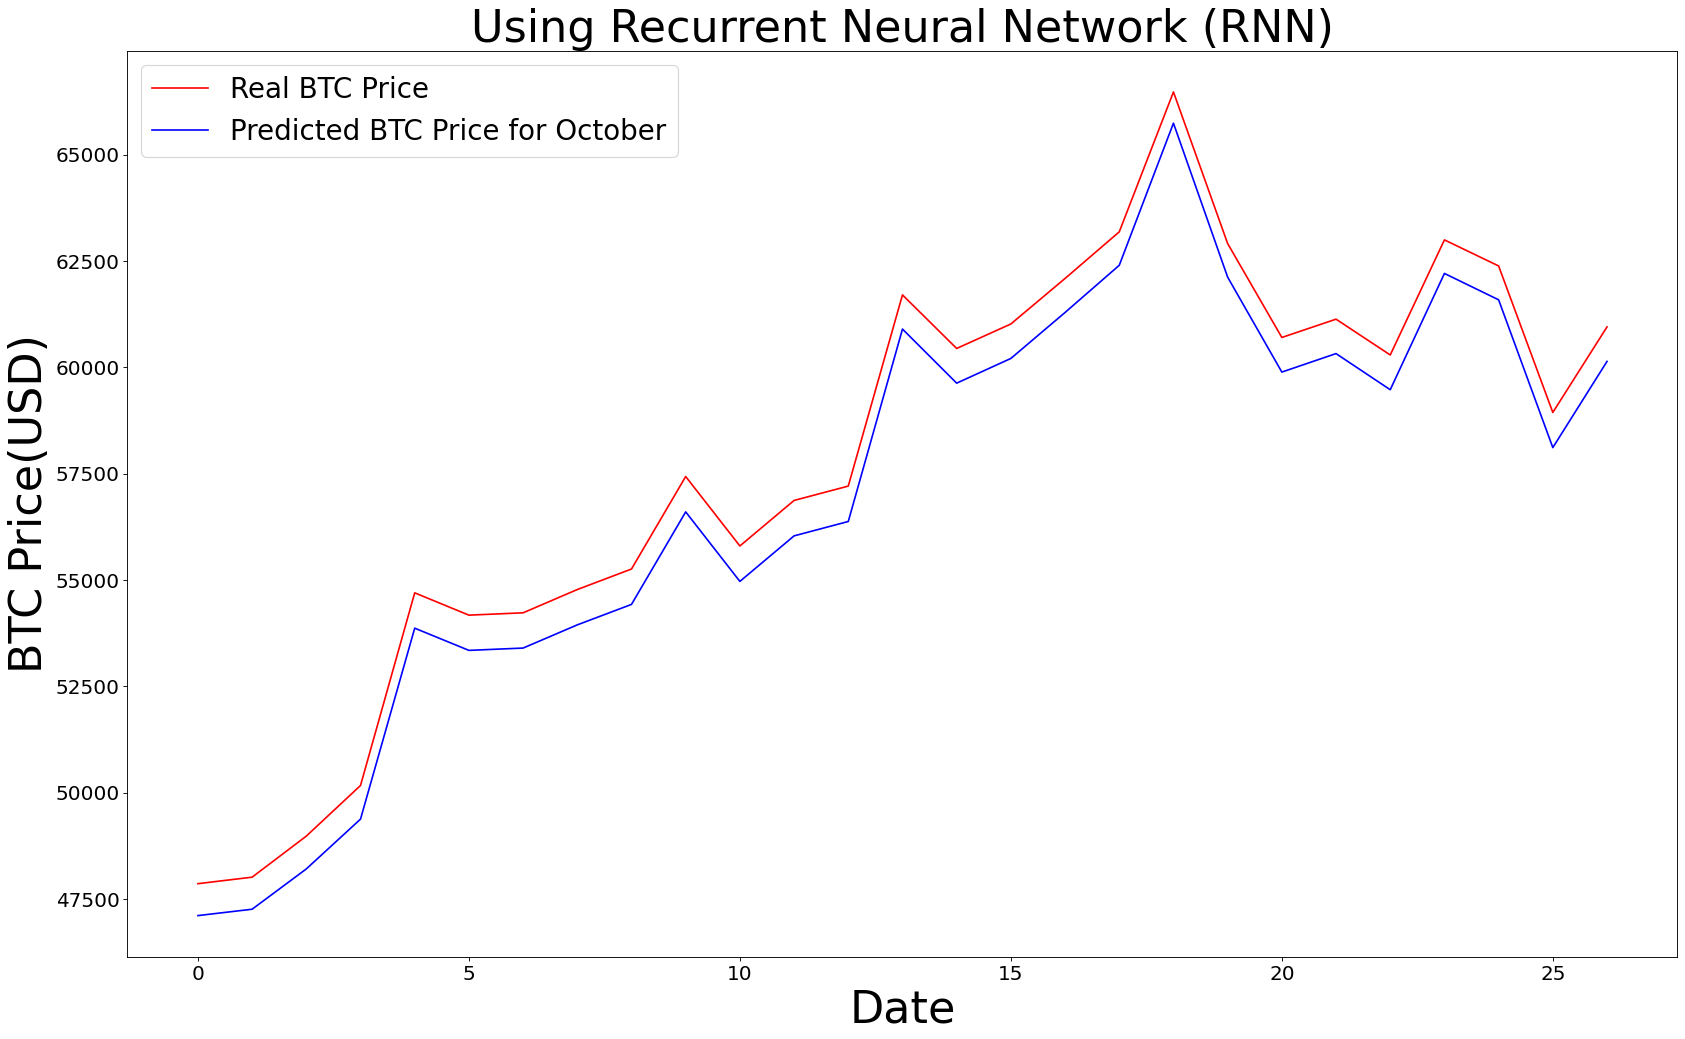

In [14]:
plt.figure(figsize=(25,15), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()  
plt.plot(test_val, color = 'red', label = 'Real BTC Price')
plt.plot(BTC_RNN_OCT, color = 'blue', label = 'Predicted BTC Price for October')
plt.title('Using Recurrent Neural Network (RNN)', fontsize=40)
df_test = df_test.reset_index()
x=df_test.index
labels = test_oct['Date']
for tick in ax.xaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_fontsize(18)
plt.xlabel('Date', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize=40)
plt.legend(loc=2, prop={'size': 25})
plt.show()

# 2. Using Long Short Term Network

In [15]:
# Initialising 
regressor = Sequential()

# Adding the LSTM layer
regressor.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling using Adam optimizaer and MSE loss
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the LSTM to the Training set
regressor.fit(X_train, y_train, batch_size = 15, epochs = 50)

Epoch 1/50
66/66 [==============================] - 1s 2ms/step - loss: 0.0959
Epoch 2/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0702
Epoch 3/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0645
Epoch 4/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0626
Epoch 5/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0609
Epoch 6/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0592
Epoch 7/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0574
Epoch 8/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0554
Epoch 9/50
66/66 [==============================] - 0s 3ms/step - loss: 0.0534
Epoch 10/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0512
Epoch 11/50
66/66 [==============================] - 0s 2ms/step - loss: 0.0489
Epoch 12/50
66/66 [==============================] - 0s 3ms/step - loss: 0.0465
Epoch 13/50
66/66 [==============================

In [26]:
# Making the predictions
test_set = df_test.values
l_inputs = np.reshape(test_set, (len(test_set), 1))
l_inputs = sc.transform(inputs)
l_inputs = np.reshape(inputs, (len(l_inputs), 1, 1))
BTC_price_lstm = regressor.predict(l_inputs)
BTC_price_lstm = sc.inverse_transform(BTC_price_lstm)
er1 = np.mean((predicted_BTC_price_lstm-test_set)**2)
print("Mean Square Error (MSE) using LSTM:", er3)

ValueError: cannot reshape array of size 150 into shape (50,1)